Gökçe Şahin 090190306 sahingo19@itu.edu.tr

In [96]:
import pandas as pd
import random
import numpy as np
import json
import requests
import wbgapi as wb

import matplotlib.pyplot as plt

from collections import Counter

# MAT 381E Homework 2

## Question 1

For this question we are going to use [an NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). 

1. Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.
2. Write a function that takes the `GAME_ID` as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.
3. Write a function that takes the `GAME_ID` as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in `PLAYER1_NAME`,`PLAYER2_NAME`, or `PLAYER3_NAME` columns.
4. Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.
3. Write a function that takes the `GAME_ID` as the parameter and returns a list of pairs of player names where the pair interacted during the game more than once. Test your function on 5 random matches.

In [97]:
def find_match(game_id, df):
    return df[df['GAME_ID'] == game_id]

In [98]:
def player_activity(game_id, df):
    res = {}

    match_df = find_match(game_id, df)
    p1names = match_df['PLAYER1_NAME']
    p2names = match_df['PLAYER2_NAME']
    p3names = match_df['PLAYER3_NAME']

    pnames = pd.concat([p1names, p2names, p3names]).dropna()
    unique_pnames = pnames.unique()

    for player in unique_pnames:
        res[player] = sum(pnames == player)

    return res

In [99]:
def player_interacted(game_id, df):
    match_df = find_match(game_id, df)
    group = match_df.groupby('PLAYER1_NAME')['PLAYER1_NAME', 'PLAYER2_NAME', 'PLAYER3_NAME']
        


    return group

In [100]:
NBA_df = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA_df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


In [101]:
a = player_interacted(21800885, NBA_df)
print(a)

C:\Users\sahin\AppData\Local\Temp\ipykernel_10988\2847310513.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = match_df.groupby('PLAYER1_NAME')['PLAYER1_NAME', 'PLAYER2_NAME', 'PLAYER3_NAME']


In [102]:
NBA_df.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

* EVENTMSGACTIONTYPE --> type of the evemt msg action (3pt jump shot, dunk, hook shot, ...)
* EVENTMSGTYPE --> type of the event msg (field goal made, foul, timeout, ...)
* EVENTNUM --> num of the event
* GAME_ID --> ID of the game
* HOMEDESCRIPTION --> description of the home
* NEUTRALDESCRIPTION --> description of the neutral
* PCTIMESTRING --> perion time
* PERIOD --> period of the match
* PERSON[i]TYPE --> type of the person[i]
* PLAYER[i]_ID --> id of the player[i]
* PLAYER[i]_NAME --> name of the player[i]
* PLAYER[i]_TEAM_ABBREVIATION --> team abbreviation of the player[i]
* PLAYER[i]_TEAM_CITY --> team city of the player[i]
* PLAYER[i]_TEAM_ID --> team id the player[i]
* PLAYER[i]_TEAM_NICKNAME --> team nickname of  the player[i]
* SCORE --> match score
* SCOREMARGIN --> margin of the match score
* VISITORDESCRIPTION --> description of the visitor
* WCTIMESTRING --> real time

i = [1, 2, 3]

In [103]:
random_game_ids_1 = [random.randint(21800794, 21801037) for i in range(5)]

for id in random_game_ids_1:
    print('GAME_ID = ' + str(id))
    display(find_match(id, NBA_df))

GAME_ID = 21800997


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
426764,0,0,12,2,21800997,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:11 PM
426765,1,0,10,4,21800997,Jump Ball Powell vs. Capela: Tip to Tucker,NaN,12:00,1,4.0,...,200782,PJ Tucker,HOU,Houston,1.610613e+09,Rockets,NaN,NaN,NaN,7:11 PM
426766,2,1,2,7,21800997,NaN,NaN,11:41,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Tucker 3PT Jump Shot,7:11 PM
426767,3,0,4,8,21800997,NaN,NaN,11:39,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capela REBOUND (Off:1 Def:0),7:11 PM
426768,4,2,6,9,21800997,Powell S.FOUL (P1.T1) (D.Collins),NaN,11:35,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:11 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427223,459,102,2,656,21800997,NaN,NaN,0:08,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Harden 2' Driving Floating Bank Jump Shot,9:17 PM
427224,460,0,4,657,21800997,Brunson REBOUND (Off:1 Def:6),NaN,0:07,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:17 PM
427225,461,1,2,658,21800997,MISS Brunson 14' Jump Shot,NaN,0:00,4,4.0,...,101108,Chris Paul,HOU,Houston,1.610613e+09,Rockets,NaN,NaN,Paul BLOCK (2 BLK),9:17 PM
427226,462,0,4,660,21800997,MAVERICKS Rebound,NaN,0:00,4,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:17 PM


GAME_ID = 21800823


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
134390,0,0,12,2,21800823,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:41 PM
134391,1,0,10,4,21800823,Jump Ball Davis vs. Towns: Tip to Jackson,NaN,12:00,1,4.0,...,1628402,Frank Jackson,NOP,New Orleans,1.610613e+09,Pelicans,NaN,NaN,NaN,9:41 PM
134392,2,5,2,7,21800823,MISS Holiday 2' Layup,NaN,11:44,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:41 PM
134393,3,0,4,8,21800823,NaN,NaN,11:42,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Okogie REBOUND (Off:0 Def:1),9:41 PM
134394,4,1,1,9,21800823,NaN,NaN,11:30,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,3 - 0,-3,Towns 3PT Jump Shot (3 PTS) (Wiggins 1 AST),9:42 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134873,483,28,6,699,21800823,NaN,NaN,0:00,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Towns Personal Take Foul (P2.PN) (M.Callahan),12:07 AM
134874,484,11,3,701,21800823,Randle Free Throw 1 of 2 (11 PTS),NaN,0:00,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,117 - 121,4,NaN,12:07 AM
134875,485,12,3,702,21800823,Randle Free Throw 2 of 2 (12 PTS),NaN,0:00,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,117 - 122,5,NaN,12:07 AM
134876,486,1,5,704,21800823,Holiday STEAL (3 STL),NaN,0:00,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teague Bad Pass Turnover (P3.T16),12:08 AM


GAME_ID = 21801018


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
581613,0,0,12,2,21801018,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:41 PM
581614,1,0,10,4,21801018,Jump Ball Capela vs. Cousins: Tip to Green,NaN,12:00,1,4.0,...,203110,Draymond Green,GSW,Golden State,1.610613e+09,Warriors,NaN,NaN,NaN,9:41 PM
581615,2,108,2,7,21801018,NaN,NaN,11:48,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Green 7' Cutting Dunk Shot,9:41 PM
581616,3,0,4,8,21801018,Harden REBOUND (Off:0 Def:1),NaN,11:45,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:41 PM
581617,4,1,2,9,21801018,MISS Tucker 3PT Jump Shot,NaN,11:40,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:41 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582027,414,0,8,614,21801018,NaN,NaN,0:06,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Cousins FOR Looney,11:56 PM
582028,415,0,8,615,21801018,NaN,NaN,0:06,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Curry FOR Livingston,11:56 PM
582029,416,12,3,619,21801018,MISS Harden Free Throw 2 of 2,NaN,0:06,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:56 PM
582030,417,0,4,620,21801018,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iguodala REBOUND (Off:0 Def:5),11:56 PM


GAME_ID = 21800961


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
254464,0,0,12,2,21800961,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
254465,1,0,10,4,21800961,Jump Ball Ibaka vs. Capela: Tip to Harden,NaN,12:00,1,4.0,...,201935,James Harden,HOU,Houston,1.610613e+09,Rockets,NaN,NaN,NaN,8:17 PM
254466,2,1,2,7,21800961,NaN,NaN,11:35,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Gordon 3PT Jump Shot,8:17 PM
254467,3,0,4,8,21800961,Green REBOUND (Off:0 Def:1),NaN,11:32,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
254468,4,4,5,9,21800961,Lowry Traveling Turnover (P1.T1),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254897,433,101,1,608,21800961,NaN,NaN,0:18,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,107 - 92,-15,Harden 9' Driving Floating Jump Shot (35 PTS),10:28 PM
254898,434,1,2,612,21800961,MISS Green 3PT Jump Shot,NaN,0:06,4,4.0,...,101108,Chris Paul,HOU,Houston,1.610613e+09,Rockets,NaN,NaN,Paul BLOCK (1 BLK),10:28 PM
254899,435,0,4,614,21800961,Green REBOUND (Off:1 Def:4),NaN,0:05,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:28 PM
254900,436,1,1,609,21800961,Green 24' 3PT Jump Shot (14 PTS),NaN,0:05,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,107 - 95,-12,NaN,10:28 PM


GAME_ID = 21800955


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
100414,0,0,12,2,21800955,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
100415,1,0,10,4,21800955,Jump Ball Ayton vs. Lopez: Tip to Middleton,NaN,12:00,1,4.0,...,203114,Khris Middleton,MIL,Milwaukee,1.610613e+09,Bucks,NaN,NaN,NaN,9:11 PM
100416,2,108,1,7,21800955,NaN,NaN,11:44,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Antetokounmpo Cutting Dunk Shot (2 PTS) (Bled...,9:11 PM
100417,3,2,6,9,21800955,Bender S.FOUL (P1.T1) (B.Nansel),NaN,11:44,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
100418,4,10,3,11,21800955,NaN,NaN,11:44,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Antetokounmpo Free Throw 1 of 1,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100938,524,11,3,725,21800955,Oubre Jr. Free Throw 1 of 2 (26 PTS),NaN,0:08,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,105 - 113,8,NaN,11:33 PM
100939,525,12,3,726,21800955,Oubre Jr. Free Throw 2 of 2 (27 PTS),NaN,0:08,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,105 - 114,9,NaN,11:33 PM
100940,526,79,2,727,21800955,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Bledsoe 25' 3PT Pullup Jump Shot,11:33 PM
100941,527,0,4,728,21800955,Bridges REBOUND (Off:2 Def:5),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:33 PM


GAME_ID = 21800867


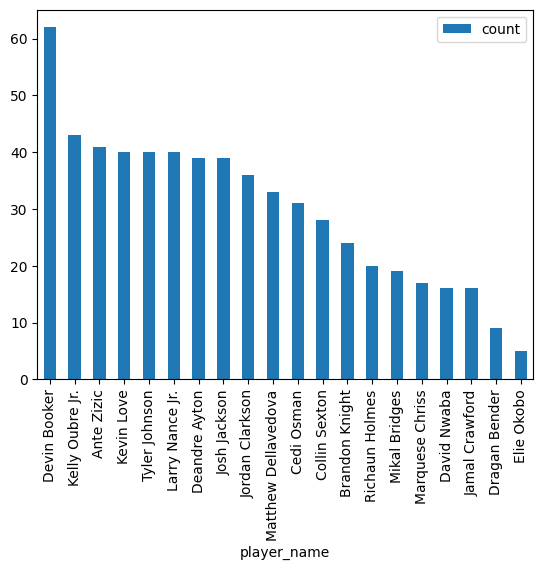

GAME_ID = 21800835


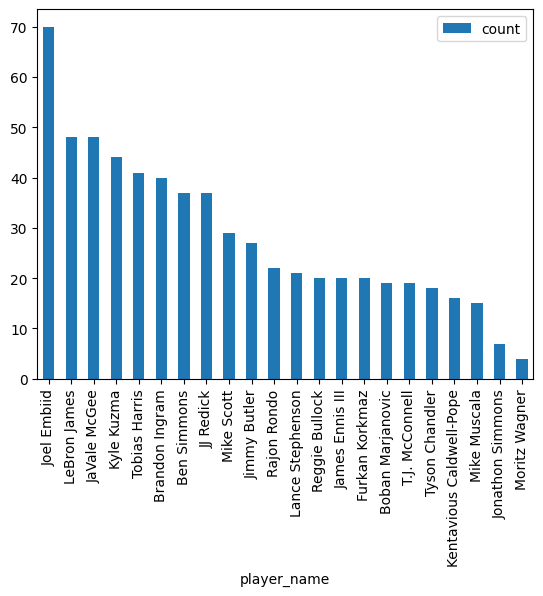

GAME_ID = 21800847


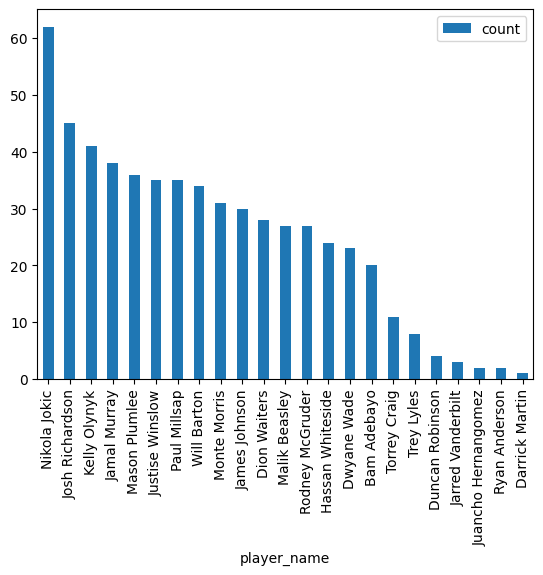

GAME_ID = 21800794


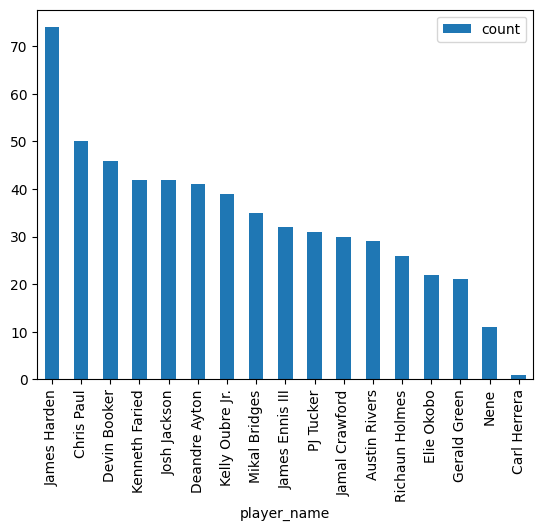

GAME_ID = 21800868


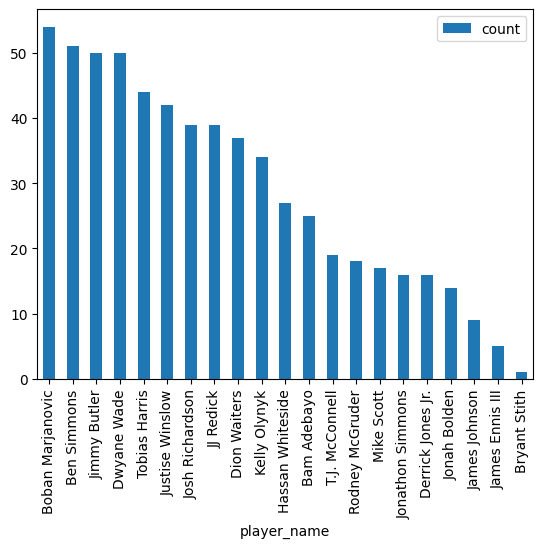

In [104]:
random_game_ids_2 = [random.randint(21800794, 21801037) for i in range(5)]

for id in random_game_ids_2:
    print('GAME_ID = ' + str(id))
    activity = player_activity(id, NBA_df)
    activity_df = pd.DataFrame(list(activity.items()), columns=['player_name', 'count'])
    sorted_activity_df = activity_df.sort_values(['count'], ascending=False)

    sorted_activity_df = sorted_activity_df.set_index('player_name')

    sorted_activity_df.plot.bar()
    plt.show()

    

## Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

1. Ingest the data as a python dictionary using the [json](https://docs.python.org/3/library/json.html) library.
2. Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function count how many times each artist appears.
3. Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.
4. Plot the result you obtain from Step 3 as a bar chart.
5. Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

In [105]:
response = requests.get("https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json")
raw = json.loads(response.text)

In [106]:
artists = [[y['artist_name'] for y in x['tracks']] for x in raw['playlists']]

In [107]:
artists_list = []

for x in artists:
    for y in x:
        artists_list.append(y)

unique_artists = np.unique(artists_list)


<AxesSubplot: xlabel='artists'>

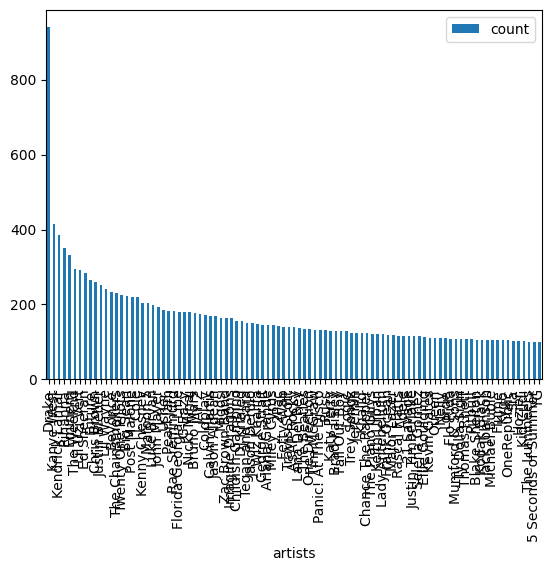

In [108]:
artists_count = Counter(artists_list)

artists_count_100 = {key: artists_count[key] for key in artists_count.keys() if artists_count[key]>100}

artists_count_100_df = pd.DataFrame(list(artists_count_100.items()), columns=['artists', 'count'])
sorted_artists_count_100_df = artists_count_100_df.sort_values(['count'], ascending=False)

sorted_artists_count_100_df = sorted_artists_count_100_df.set_index('artists')

sorted_artists_count_100_df.plot.bar()

In [109]:
songs = [[y['track_name'] for y in x['tracks']] for x in raw['playlists']]

In [110]:
songs_list = []

for x in songs:
    for y in x:
        songs_list.append(y)

In [111]:
songs_count = Counter(songs_list)

songs_count_25 = {key: songs_count[key] for key in songs_count.keys() if songs_count[key]>25}

<AxesSubplot: xlabel='songs'>

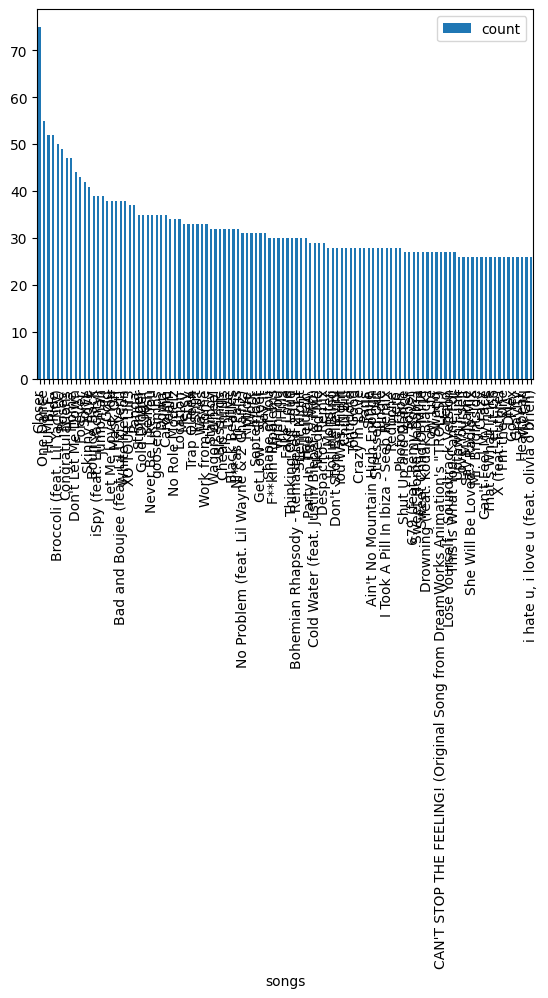

In [112]:
songs_count_25_df = pd.DataFrame(list(songs_count_25.items()), columns=['songs', 'count'])
sorted_songs_count_25_df = songs_count_25_df.sort_values(['count'], ascending=False)

sorted_songs_count_25_df = sorted_songs_count_25_df.set_index('songs')
sorted_songs_count_25_df

sorted_songs_count_25_df.plot.bar()

## Question 3

For this question we are going to use [Wordbank Data](https://data.worldbank.org/). I would suggest [wbgapi](https://pypi.org/project/wbgapi/) library.

1. Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.
2. Get the data for Turkey for the following indicators:
   * [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
   * [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
   * [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
   * [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
   * [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
3. Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.
4. Write a function that takes two indicators `id1` and `id2` and does a scatter plot of `id1` against `id2` after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.

In [113]:
def extract(df, cntry, name):
    tmp = df[['time','value']][df['economy']==cntry]
    tmp.index = tmp.time
    del tmp['time']
    tmp.columns = [[name]]
    return tmp

def vars(cntry, dfs, inds):
    arr = [extract(dfs[i], cntry, inds[i]) for i in range(len(inds))]
    res = arr[0].join(arr[1:6])
    res.dropna(inplace=True)
    
    return res

In [114]:
def scatter_ind(cntry, dfs, id1, id2):
    df = vars(cntry, dfs, [id1, id2])
    plt.scatter(df[id1], df[id2])
    
    return

In [115]:
inds = ['SI.POV.NAHC', 'SH.XPD.CHEX.PC.CD', 'SL.TLF.CACT.FE.NE.ZS',
            'SH.DYN.MORT', 'SE.ADT.LITR.FE.ZS']

In [116]:
dfs = [pd.DataFrame(list(wb.data.fetch(ind))) for ind in inds]

In [117]:
vars_df = vars('TUR', dfs, inds)

In [118]:
a = vars_df.loc[:, 'SI.POV.NAHC']

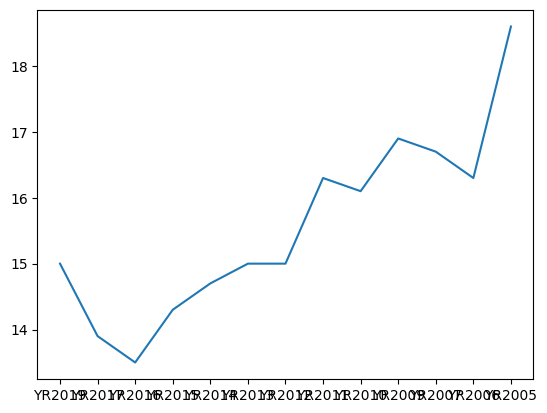

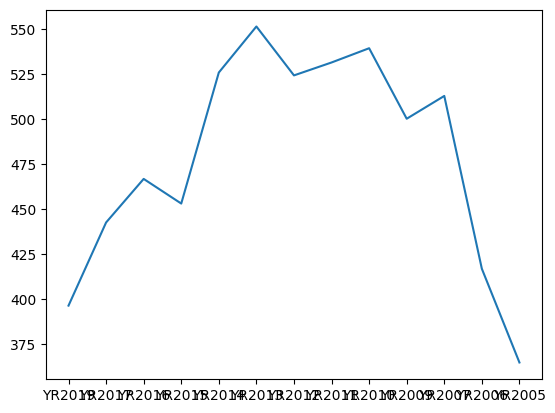

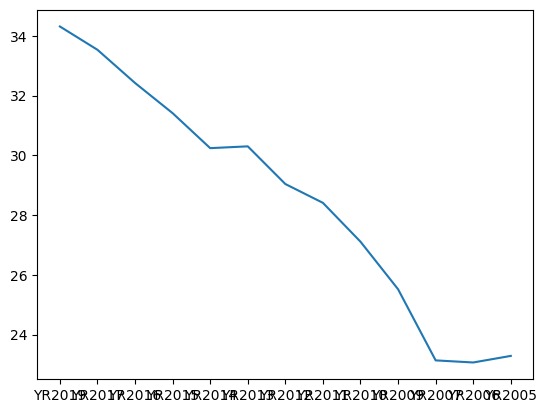

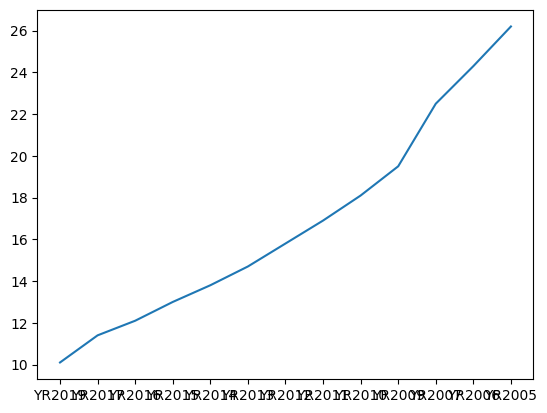

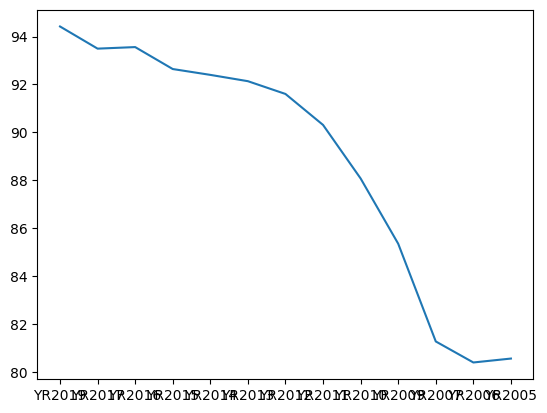

In [119]:
for ind in inds:
    plt.plot(vars_df.index, vars_df[ind])
    plt.show()

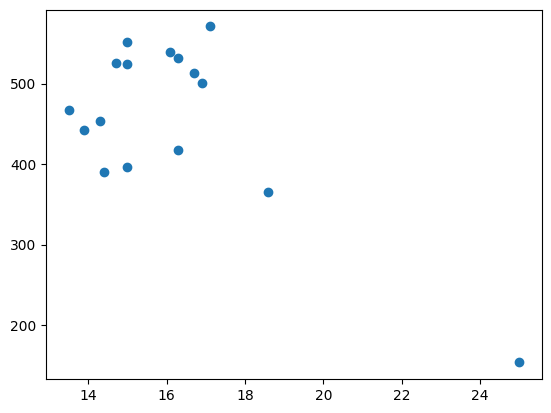

In [120]:
scatter_ind('TUR', dfs, inds[0], inds[1])
